In [1]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import numpy as np
import pandas as pd
import os

In [2]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
import seaborn as sns

In [3]:
load_dotenv()

True

In [4]:
def tickerGrab(ticker, period="5y"):
    symbol = yf.Ticker(ticker)
    symbol_hist = symbol.history(period=period)
    symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
    symbol_hist.to_csv(f"{ticker}_hist.csv")
    return symbol_hist

In [5]:
# sp500 stock data last 5-years
sp500 = tickerGrab(ticker="^GSPC")
sp500.head()

Open         High          Low        Close      Volume
Date                                                                      
2016-06-02  2097.709961  2105.260010  2088.590088  2105.260010  3632720000
2016-06-03  2104.070068  2104.070068  2085.360107  2099.129883  3627780000
2016-06-06  2100.830078  2113.360107  2100.830078  2109.409912  3442020000
2016-06-07  2110.179932  2119.219971  2110.179932  2112.129883  3534730000
2016-06-08  2112.709961  2120.550049  2112.709961  2119.120117  3562060000

In [6]:
# nasdaq stock data last 5-years
nasdaq = tickerGrab(ticker="^IXIC")
nasdaq.head()

Open         High          Low        Close      Volume
Date                                                                      
2016-06-02  4941.250000  4971.359863  4924.229980  4971.359863  1729050000
2016-06-03  4958.100098  4958.649902  4909.209961  4942.520020  1697840000
2016-06-06  4950.459961  4980.140137  4944.870117  4968.709961  1663840000
2016-06-07  4972.129883  4979.379883  4960.279785  4961.750000  1747760000
2016-06-08  4970.009766  4979.660156  4956.790039  4974.640137  1692640000

In [7]:
# total world market stock data last 5-years
msci_world = tickerGrab(ticker="MSCI")
msci_world.head()

Open       High        Low      Close   Volume
Date                                                           
2016-06-02  74.364769  74.809671  74.203849  74.449966   827200
2016-06-03  73.825199  73.825199  72.925934  72.992195  1212100
2016-06-06  72.812368  73.588579  71.704850  73.228874   993200
2016-06-07  73.418173  73.872544  72.907009  73.721085   900000
2016-06-08  73.598021  74.203844  73.295110  73.882004   626900

In [8]:
ethereum = tickerGrab(ticker="ETH-USD")
ethereum.head() 

Open     High      Low    Close    Volume
Date                                                    
2016-06-02  13.9917  14.0484  13.6292  13.7380  10477200
2016-06-03  13.7429  13.8738  13.2543  13.8467  22981500
2016-06-04  13.8643  13.9454  13.4218  13.7404  15792400
2016-06-05  13.7625  14.0722  13.5678  13.9750  11088400
2016-06-06  14.0007  14.0585  13.7349  13.9341   8720400

In [9]:
bitcoin_cash = tickerGrab(ticker="BCH-USD")
bitcoin_cash.head()

Open        High         Low       Close   Volume
Date                                                               
2017-07-23  555.885986  578.971008  411.776001  413.059998    85013
2017-07-24  412.579987  578.892029  409.210999  440.700989   190952
2017-07-25  441.345001  541.658020  338.091003  406.897003   524908
2017-07-26  407.082001  486.158997  321.791992  365.816010  1784640
2017-07-27  417.097992  460.968994  367.777008  385.479004   533207

In [10]:
litecoin = tickerGrab(ticker="LTC-USD")
litecoin.head()

Open     High      Low    Close   Volume
Date                                                   
2016-06-02  4.74465  4.75948  4.67956  4.71505  2121360
2016-06-03  4.71958  4.86572  4.70556  4.86097  4061990
2016-06-04  4.86319  4.90247  4.77022  4.80804  3214800
2016-06-05  4.79843  4.84259  4.78622  4.81291  2257820
2016-06-06  4.81446  4.96647  4.81036  4.95916  2993510

In [11]:
bitcoin = tickerGrab(ticker="BTC-USD")
bitcoin.head()

Open        High         Low       Close     Volume
Date                                                                 
2016-06-02  536.515015  540.351990  533.078003  537.971985   60378200
2016-06-03  537.682007  574.638000  536.919983  569.193970  122020000
2016-06-04  569.705017  590.132019  564.237976  572.726990   94925296
2016-06-05  573.307983  582.807983  569.177979  574.976990   68874096
2016-06-06  574.601990  586.469971  574.601990  585.536987   72138896

In [12]:
cardano = tickerGrab(ticker="ADA-USD")
cardano.head()

Open      High       Low     Close    Volume
Date                                                        
2017-10-01  0.021678  0.032226  0.017354  0.024969  50068700
2017-10-02  0.024607  0.030088  0.019969  0.025932  57641300
2017-10-03  0.025757  0.027425  0.020690  0.020816  16997800
2017-10-04  0.020864  0.022806  0.020864  0.021931   9000050
2017-10-05  0.021951  0.022154  0.020859  0.021489   5562510

In [13]:
dash = tickerGrab(ticker="DASH-USD")
dash.head()

Open     High      Low    Close  Volume
Date                                                  
2016-06-02  8.22887  8.24121  7.93442  8.09979  318685
2016-06-03  8.12308  8.31405  7.77742  8.06082  447007
2016-06-04  8.05859  8.19569  7.84819  8.04639  445286
2016-06-05  8.03701  8.17407  7.58120  7.58120  537053
2016-06-06  7.58743  7.85517  7.57517  7.77366  302748

In [14]:
aave = tickerGrab(ticker="AAVE-USD")
aave.head()

Open        High         Low       Close     Volume
Date                                                                 
2021-04-01  377.183685  385.298737  369.995331  377.611786  342371946
2021-04-02  377.514648  408.479919  374.290924  406.692291  480081712
2021-04-03  406.883606  411.377075  385.415894  385.420563  395544800
2021-04-04  385.526978  409.579529  382.788849  404.309723  330959728
2021-04-05  404.392944  407.329315  388.300354  397.924561  306918909

In [15]:
# combined stock indexes

In [16]:
combined_stocks = pd.concat([sp500['Close'], nasdaq['Close'], msci_world['Close']], axis = 1)
combined_stocks.columns = ['sp500 price', 'nasdaq price', 'msci world price']
combined_stocks.head()

sp500 price  nasdaq price  msci world price
Date                                                   
2016-06-02  2105.260010   4971.359863         74.449966
2016-06-03  2099.129883   4942.520020         72.992195
2016-06-06  2109.409912   4968.709961         73.228874
2016-06-07  2112.129883   4961.750000         73.721085
2016-06-08  2119.120117   4974.640137         73.882004

In [17]:
combined_stocks_plot=combined_stocks.hvplot(
    title = 'Composite Returns Last 5 Years'
)
combined_stocks_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:
# combine cryptos

In [19]:
combined_cyrpto = pd.concat([bitcoin['Close'], ethereum['Close'], cardano['Close'], bitcoin_cash['Close'], 
litecoin['Close'], aave['Close'], dash['Close']], axis = 1)

combined_cyrpto.columns = ['bitcoin price', 'ethereum price', 'cardano price', 'bitcoin cash price', 'litecoin price'
, 'aave priice', 'dash price']

combined_cyrpto.tail()

bitcoin price  ethereum price  cardano price  bitcoin cash price  \
Date                                                                           
2021-05-28   35697.605469     2419.906250       1.511987          689.947876   
2021-05-29   34616.066406     2279.514160       1.406232          651.579956   
2021-05-30   35678.128906     2390.305420       1.577279          663.512024   
2021-05-31   37332.855469     2714.945312       1.742778          703.882568   
2021-06-02   36580.183594     2601.955322       1.738156          690.897644   

            litecoin price  aave priice  dash price  
Date                                                 
2021-05-28      177.320663   320.381165  183.186523  
2021-05-29      163.808105   297.899628  176.790436  
2021-05-30      170.978226   325.148407  182.088547  
2021-05-31      188.033676   383.083405  197.801453  
2021-06-02      182.805649   369.951996  190.769379

In [20]:
combined_cyrpto_plot=combined_cyrpto.hvplot(
    title = 'Crypto Returns Last 5 Years'
)
combined_cyrpto_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [21]:
#combine plots of indexes and cryptos

In [22]:
combined_cyrpto_plot * combined_stocks_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [23]:
# combine both indexes and cryptos

In [24]:
portfolio_df = pd.concat([combined_stocks, combined_cyrpto], axis = 1, join = 'inner')
portfolio_df.tail()

sp500 price  nasdaq price  msci world price  bitcoin price  \
Date                                                                     
2021-05-24  4197.049805  13661.169922        462.850006   38705.980469   
2021-05-25  4188.129883  13657.169922        464.609985   38402.222656   
2021-05-26  4195.990234  13738.000000        465.100006   39294.199219   
2021-05-27  4200.879883  13736.280273        464.369995   38436.968750   
2021-05-28  4204.109863  13748.740234        468.130005   35697.605469   

            ethereum price  cardano price  bitcoin cash price  litecoin price  \
Date                                                                            
2021-05-24     2643.591064       1.549485          748.421692      183.994125   
2021-05-25     2706.628906       1.555369          719.947815      183.497894   
2021-05-26     2888.698730       1.782702          765.048828      199.224335   
2021-05-27     2736.488525       1.645960          745.955078      193.121094   
2021-05-28     2419.906250       1.511987          689.947876      177.320663   

            aave priice  dash price  
Date                                 
2021-05-24   385.571594  199.952576  
2021-05-25   371.380249  195.235168  
2021-05-26   414.932953  214.202271  
2021-05-27   369.978119  203.325684  
2021-05-28   320.381165  183.186523

In [25]:
portfolio_df.hvplot(
    title = 'Index and Crypto returns'
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [26]:
#heat map of combined portfolio

In [27]:
heat = portfolio_df.pct_change().corr()

<AxesSubplot:>

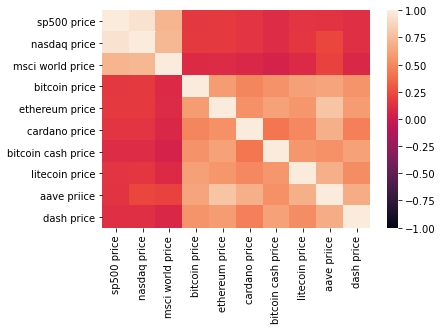

In [28]:
sns.heatmap(heat, vmin=-1, vmax=1)

In [29]:
# annual returns
annual_returns = portfolio_df.pct_change().mean() * 252
annual_returns

sp500 price           0.157686
nasdaq price          0.228355
msci world price      0.420466
bitcoin price         1.145667
ethereum price        1.664571
cardano price         2.318543
bitcoin cash price    1.128138
litecoin price        1.364987
aave priice           0.532402
dash price            1.280924
dtype: float64

<AxesSubplot:>

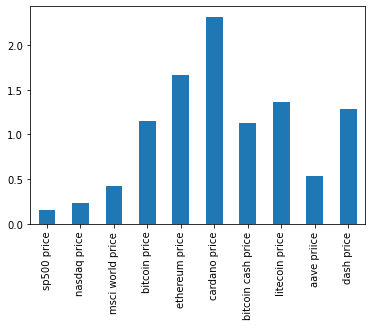

In [30]:
annual_returns.plot(kind = 'bar')

In [31]:
daily_returns = portfolio_df.pct_change()
daily_returns.tail()

sp500 price  nasdaq price  msci world price  bitcoin price  \
Date                                                                     
2021-05-24     0.009911      0.014118          0.013067       0.037563   
2021-05-25    -0.002125     -0.000293          0.003802      -0.007848   
2021-05-26     0.001877      0.005919          0.001055       0.023227   
2021-05-27     0.001165     -0.000125         -0.001570      -0.021816   
2021-05-28     0.000769      0.000907          0.008097      -0.071269   

            ethereum price  cardano price  bitcoin cash price  litecoin price  \
Date                                                                            
2021-05-24        0.087619      -0.001799            0.087890        0.021072   
2021-05-25        0.023846       0.003797           -0.038045       -0.002697   
2021-05-26        0.067268       0.146160            0.062645        0.085704   
2021-05-27       -0.052692      -0.076705           -0.024958       -0.030635   
2021-05-28       -0.115689      -0.081395           -0.075081       -0.081816   

            aave priice  dash price  
Date                                 
2021-05-24     0.032545    0.059468  
2021-05-25    -0.036806   -0.023593  
2021-05-26     0.117273    0.097150  
2021-05-27    -0.108342   -0.050777  
2021-05-28    -0.134054   -0.099049

In [32]:
#rolling volatility 
##crypto looks like a roller-coaster.

daily_returns.rolling(200).std() * np.sqrt(200)
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

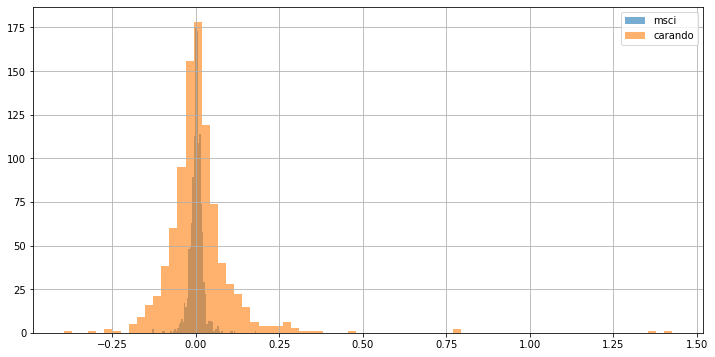

In [33]:
#histogram of nasdaq and cardano, one stock index and one crypto. Picked highest performing crypto and sp500.
daily_returns['msci world price'].hist(label='msci', figsize = (20,10), bins = 75, alpha = 0.6)
daily_returns['cardano price'].hist(label='carando', figsize = (12,6), bins = 75, alpha = 0.6)
plt.legend()

In [34]:
#We can plot out the price returns on a histogram chart. The wider the distribution the more volatile it is. 
#You can see that MSCI is mostly within the mean distribution. But cardano spreads widely across the x-axis. Sometimes 
#the returns can be 10%,15% or 20%. But you will never see a day sp500 up 15%.

In [35]:
#covariance

#Covariance tells us the relationship between the variables. We are trying to find if there is a linear 
#relationship between assets.

#For example, if bitcoin gains 5%, how do the returns of sp500 correspond to it? Does it also gain 5%? Or does it show no 
#response to it? That is one way to think about covariance. Let’s see their annual covariance.

In [36]:
#annual covariance
annual_cov = daily_returns.cov() * 252
annual_cov

sp500 price  nasdaq price  msci world price  \
sp500 price            0.036641      0.039154          0.043284   
nasdaq price           0.039154      0.046750          0.049847   
msci world price       0.043284      0.049847          0.100597   
bitcoin price          0.024561      0.028708          0.024407   
ethereum price         0.037925      0.042984          0.036669   
cardano price          0.057793      0.064852          0.054451   
bitcoin cash price     0.035040      0.039174          0.031054   
litecoin price         0.033555      0.039463          0.034931   
aave priice            0.030542      0.068127          0.075703   
dash price             0.029273      0.033186          0.032114   

                    bitcoin price  ethereum price  cardano price  \
sp500 price              0.024561        0.037925       0.057793   
nasdaq price             0.028708        0.042984       0.064852   
msci world price         0.024407        0.036669       0.054451   
bitcoin price            0.596592        0.520788       0.682026   
ethereum price           0.520788        1.277440       0.968098   
cardano price            0.682026        0.968098       3.036673   
bitcoin cash price       0.638970        0.928426       0.995466   
litecoin price           0.550418        0.747463       0.983768   
aave priice              0.953737        1.983930       1.803997   
dash price               0.497962        0.784597       0.946130   

                    bitcoin cash price  litecoin price  aave priice  \
sp500 price                   0.035040        0.033555     0.030542   
nasdaq price                  0.039174        0.039463     0.068127   
msci world price              0.031054        0.034931     0.075703   
bitcoin price                 0.638970        0.550418     0.953737   
ethereum price                0.928426        0.747463     1.983930   
cardano price                 0.995466        0.983768     1.803997   
bitcoin cash price            2.102036        0.932075     2.100884   
litecoin price                0.932075        1.351115     1.834647   
aave priice                   2.100884        1.834647     2.952986   
dash price                    1.057491        0.712425     2.176813   

                    dash price  
sp500 price           0.029273  
nasdaq price          0.033186  
msci world price      0.032114  
bitcoin price         0.497962  
ethereum price        0.784597  
cardano price         0.946130  
bitcoin cash price    1.057491  
litecoin price        0.712425  
aave priice           2.176813  
dash price            1.344236

In [37]:
#The variance of sp500 is 0.036586. The variance of bitcoin is 0.5960695. The covariance between bitcoin and 
#sp500 is 0.024520 At this point in time, we can only tell that a positive covariance value means there is a positive 
#linear relationship. However, it does not tell us anything about the gradient of the slope or the strength of the 
#relationship. In order to do so, we need to calculate the correlation.

In [38]:
#correlation tells us how strong a relationship between the variables is. The values are between -1 to 1. A value of -1 
#means it is perfectly negatively correlated. 0 means no correlation and 1 means perfectly positively correlated.

In [39]:
daily_returns.corr()

sp500 price  nasdaq price  msci world price  \
sp500 price            1.000000      0.946040          0.712943   
nasdaq price           0.946040      1.000000          0.726874   
msci world price       0.712943      0.726874          1.000000   
bitcoin price          0.166119      0.171897          0.099630   
ethereum price         0.175297      0.175890          0.102291   
cardano price          0.152771      0.153080          0.088861   
bitcoin cash price     0.113927      0.113499          0.061931   
litecoin price         0.150809      0.157021          0.094750   
aave priice            0.143838      0.228942          0.212360   
dash price             0.131901      0.132383          0.087330   

                    bitcoin price  ethereum price  cardano price  \
sp500 price              0.166119        0.175297       0.152771   
nasdaq price             0.171897        0.175890       0.153080   
msci world price         0.099630        0.102291       0.088861   
bitcoin price            1.000000        0.596557       0.496761   
ethereum price           0.596557        1.000000       0.544789   
cardano price            0.496761        0.544789       1.000000   
bitcoin cash price       0.548656        0.620944       0.422962   
litecoin price           0.613067        0.568949       0.507515   
aave priice              0.636922        0.790945       0.690660   
dash price               0.556057        0.598741       0.466191   

                    bitcoin cash price  litecoin price  aave priice  \
sp500 price                   0.113927        0.150809     0.143838   
nasdaq price                  0.113499        0.157021     0.228942   
msci world price              0.061931        0.094750     0.212360   
bitcoin price                 0.548656        0.613067     0.636922   
ethereum price                0.620944        0.568949     0.790945   
cardano price                 0.422962        0.507515     0.690660   
bitcoin cash price            1.000000        0.568258     0.540067   
litecoin price                0.568258        1.000000     0.694934   
aave priice                   0.540067        0.694934     1.000000   
dash price                    0.624524        0.528634     0.678361   

                    dash price  
sp500 price           0.131901  
nasdaq price          0.132383  
msci world price      0.087330  
bitcoin price         0.556057  
ethereum price        0.598741  
cardano price         0.466191  
bitcoin cash price    0.624524  
litecoin price        0.528634  
aave priice           0.678361  
dash price            1.000000

In [40]:
#correlation between sp500 and bitcoin is 0.166047 or 16.6%, which is a low correlation. 
#Note that we are comparing the correlation between the assets’ returns rather than the price movement
#Another thing is that we don’t multiply by 252 trading days. This is because there is no average daily correlation value 
#here. We are just trying to find out the correlation between both assets across the entire data set.
#Is it surprising to see such a low correlation? Well, the earlier two price chart says it all. sp00 returns (stocks) pale 
#in comparison to bitcoin (crpyto), drastically.

In [41]:
# You might ask, why do we need to calculate the covariance or correlation?

# This is because the volatility of one’s portfolio depends on three things.

# 1. The standard deviation of the individual assets
# 2. Weight of the assets
# 3. Covariance between the assets

# Hence, the covariance value is one of the inputs that we need to calculate portfolio volatility. The lower the covariance 
# between the two assets, the lower the volatility. This is because they do not move in tandem. Generally speaking, a 
# portfolio of assets that have a high correlation or covariance between one another usually has higher volatility.

In [42]:
#The objective goal of Team1 is to help assist you to determine appropriate weights of stocks and crpto in your portfolio.
#The folowiing will tell you where the Sharpe ratio is the highest. That is the point where the adjusted-risk return is the 
#maximum. We will use the following analysis to tell us the weights of the assets at this particular point.

In [43]:
iterations = 1000
results = np.zeros((5,iterations))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
weighted_portfolio = portfolio_df[['msci world price','cardano price']]
weighted_portfolio.tail()

msci world price  cardano price
Date                                       
2021-05-24        462.850006       1.549485
2021-05-25        464.609985       1.555369
2021-05-26        465.100006       1.782702
2021-05-27        464.369995       1.645960
2021-05-28        468.130005       1.511987

In [45]:
weighted_annual_returns = weighted_portfolio.pct_change().mean() * 252
weighted_annual_returns

msci world price    0.420466
cardano price       2.318543
dtype: float64

In [46]:
#assets = weighted_portfolio[['msci world price','cardano price']]
assets = ['MSCI','cardano']

In [47]:
weightged_daily_returns = weighted_portfolio.pct_change()

In [48]:
weighted_annual_cov = weightged_daily_returns.cov() * 252
weighted_annual_cov

msci world price  cardano price
msci world price          0.100597       0.054451
cardano price             0.054451       3.036673

In [49]:
for i in range(iterations):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weighted_annual_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(weighted_annual_cov, weights)))
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]
    results[3,i] = weights[0]
    results[4,i] = weights[1]

In [50]:
weighted_results = pd.DataFrame(results.T,columns=['returns','stdev','sharpe','MSCI weight','cardano weight'])
weighted_results.sort_values(by='returns')

returns     stdev    sharpe  MSCI weight  cardano weight
29   0.422135  0.317045  1.331465     0.999121        0.000879
197  0.424920  0.316854  1.341057     0.997654        0.002346
234  0.425825  0.316797  1.344159     0.997176        0.002824
697  0.434673  0.316347  1.374039     0.992515        0.007485
426  0.438361  0.316221  1.386248     0.990572        0.009428
..        ...       ...       ...          ...             ...
523  2.298370  1.724421  1.332836     0.010628        0.989372
51   2.300575  1.726407  1.332579     0.009466        0.990534
218  2.305666  1.730997  1.331988     0.006784        0.993216
811  2.310475  1.735332  1.331431     0.004250        0.995750
349  2.317171  1.741368  1.330661     0.000723        0.999277

[1000 rows x 5 columns]

In [51]:
# The highest return is 235% with a 99.8% weight in Cardano. However, that also means the portfolio volatility is 174%, 
#which is extremly risky. On the other hand, the lowest return is 42% with a 99.8% weight in MSCI. The volatility is 
#only 31.6%.

In [52]:
#Plotting out all the data points of 1000 different weight combinations, we can find out the 
#exact point where the Sharpe ratio is the highest.

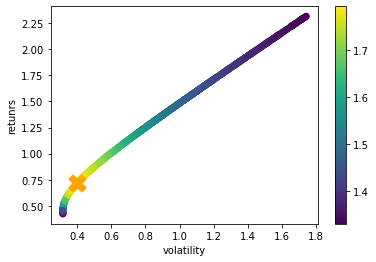

In [53]:
max_sharpe = weighted_results.iloc[weighted_results['sharpe'].idxmax()]

plt.scatter(weighted_results.stdev,weighted_results.returns,c=weighted_results.sharpe)
plt.xlabel('volatility')
plt.ylabel('retunrs')
plt.colorbar()

plt.scatter(max_sharpe[1],max_sharpe[0],marker="X",color='orange',s=300)

In [54]:
#The Sharpe ratio is the point where the adjusted-risk return is the highest.

In [55]:
print(max_sharpe)

returns           0.716513
stdev             0.399842
sharpe            1.791989
MSCI weight       0.844028
cardano weight    0.155972
Name: 617, dtype: float64


In [56]:
#The optimal weight based on the past 5-years price returns, statistics, modern portfolio theories, mathematics, and 
#previous anaylsis is 84% MSCI and 16% cardano. This weighted allocation would give an average return of about 72.6%. 
#The volatility is about 40%. You achieve higher returns with exposure to cardano (crypto), but your risk is also 
#mitigated by having a heavier weight in MSCI (stocks).

In [57]:
msci_weight=max_sharpe[3]
msci_weight

0.8440278864418087

In [58]:
cardano_weight=max_sharpe[4]
cardano_weight

0.15597211355819124

In [59]:
msci_weight + cardano_weight

1.0

In [83]:
highest_stock_crypto = portfolio_df[['msci world price', 'cardano price']]
highest_stock_crypto.head()

msci world price  cardano price
Date                                       
2016-06-02         74.449966            NaN
2016-06-03         72.992195            NaN
2016-06-06         73.228874            NaN
2016-06-07         73.721085            NaN
2016-06-08         73.882004            NaN

In [84]:
highest_stock_crypto.columns=pd.MultiIndex.from_tuples(map(lambda x: (x[1], 'close'), highest_stock_crypto.columns))
highest_stock_crypto

s         a
                 close     close
Date                            
2016-06-02   74.449966       NaN
2016-06-03   72.992195       NaN
2016-06-06   73.228874       NaN
2016-06-07   73.721085       NaN
2016-06-08   73.882004       NaN
...                ...       ...
2021-05-24  462.850006  1.549485
2021-05-25  464.609985  1.555369
2021-05-26  465.100006  1.782702
2021-05-27  464.369995  1.645960
2021-05-28  468.130005  1.511987

[1253 rows x 2 columns]

In [85]:
from MCForecastTools import MCSimulation

In [86]:
mc_fiveyear = MCSimulation(highest_stock_crypto, [msci_weight,cardano_weight], 500, 252*5)

In [87]:
mc_fiveyear.portfolio_data.head()

s                  a             
                close daily_return close daily_return
Date                                                 
2016-06-02  74.449966          NaN   NaN          NaN
2016-06-03  72.992195    -0.019581   NaN          NaN
2016-06-06  73.228874     0.003243   NaN          NaN
2016-06-07  73.721085     0.006722   NaN          NaN
2016-06-08  73.882004     0.002183   NaN          NaN

In [88]:
mc_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2         3          4           5    \
0      1.000000  1.000000   1.000000  1.000000   1.000000    1.000000   
1      0.998425  0.983897   1.005534  1.034788   1.006401    1.020341   
2      1.027599  0.985243   0.996115  1.059117   1.031633    1.055180   
3      0.991219  0.979574   0.996285  1.058096   1.088486    1.113491   
4      0.961468  0.926128   0.985516  1.013159   1.085824    1.157135   
...         ...       ...        ...       ...        ...         ...   
1256  30.181963  8.183058  21.075426  3.519780  35.172680  108.681481   
1257  30.458326  8.175192  20.349790  3.461221  36.648073  102.613283   
1258  30.063775  8.414554  20.703780  3.336880  36.692124  102.983531   
1259  30.015701  8.471108  20.973111  3.428763  36.519077  104.662752   
1260  29.661456  8.530020  20.951502  3.496243  37.445906  104.743998   

             6          7          8          9    ...        490       491  \
0       1.000000   1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1       1.019846   1.024085   1.022317   1.015873  ...   1.017620  0.990528   
2       1.007964   1.056847   1.035682   1.012057  ...   1.025342  1.019179   
3       1.017087   1.122506   1.025928   1.008390  ...   1.000205  1.025683   
4       1.037317   1.064026   1.034316   1.072317  ...   1.024611  1.019041   
...          ...        ...        ...        ...  ...        ...       ...   
1256  301.173762  60.123033  22.705602  13.256214  ...  20.374415  5.759837   
1257  309.532800  58.385889  23.046086  13.426970  ...  19.883842  5.874012   
1258  321.839186  59.115249  23.164579  13.176865  ...  19.285606  5.560326   
1259  325.090292  61.952896  22.309954  13.526824  ...  18.959243  5.616250   
1260  329.590045  60.697557  21.983344  13.788336  ...  18.848943  5.725230   

            492       493        494        495        496        497  \
0      1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.022818  0.992654   1.049033   0.978585   0.971737   0.991157   
2      1.052022  1.009535   1.074943   1.024401   0.970159   0.975373   
3      1.061023  0.975679   1.062415   1.006148   1.000614   0.957172   
4      1.092015  0.958449   1.051818   1.006698   1.002023   0.929481   
...         ...       ...        ...        ...        ...        ...   
1256  31.722331  4.846362  19.620929  30.018612  35.455029  23.517661   
1257  32.362490  4.940906  19.741039  30.759820  37.884037  23.110123   
1258  32.688854  4.816217  19.688357  31.636521  38.269672  22.123684   
1259  33.394200  4.772082  19.387242  32.112682  38.011356  23.018767   
1260  32.402694  4.770133  20.335241  32.690965  37.831423  22.862309   

            498        499  
0      1.000000   1.000000  
1      0.994337   1.018655  
2      0.989023   0.982340  
3      0.951854   0.990101  
4      0.919971   0.995071  
...         ...        ...  
1256  30.338894  49.787450  
1257  30.366902  48.766586  
1258  30.611627  49.134007  
1259  29.706405  50.912931  
1260  29.579917  52.453472  

[1261 rows x 500 columns]

In [89]:
mc_fiveyear.simulated_return.mean(axis=1)

0        1.000000
1        1.002083
2        1.003462
3        1.007242
4        1.010188
          ...    
1256    34.985884
1257    35.072665
1258    35.175533
1259    35.291115
1260    35.372047
Length: 1261, dtype: float64

In [90]:
mc_fiveyear.simulated_return.median(axis=1)

0        1.000000
1        1.001207
2        1.003060
3        1.008038
4        1.009801
          ...    
1256    24.978322
1257    25.002231
1258    25.040616
1259    25.211856
1260    25.386711
Length: 1261, dtype: float64

In [91]:
mc_fiveyear.simulated_return.min(axis=1)

0       1.000000
1       0.938837
2       0.901311
3       0.875380
4       0.872256
          ...   
1256    1.490357
1257    1.543180
1258    1.565805
1259    1.616170
1260    1.659197
Length: 1261, dtype: float64

In [92]:
mc_fiveyear.simulated_return.max(axis=1)

0         1.000000
1         1.069447
2         1.085897
3         1.122506
4         1.157135
           ...    
1256    359.837979
1257    360.339779
1258    369.368013
1259    355.795823
1260    353.005047
Length: 1261, dtype: float64

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

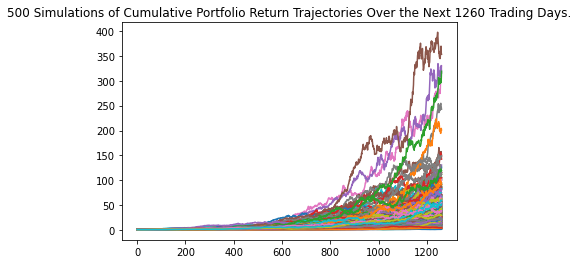

In [93]:
mc_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

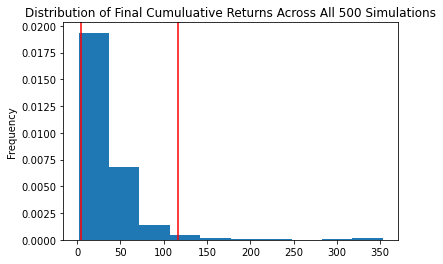

In [94]:
mc_fiveyear.plot_distribution()

In [95]:
mc_fiveyear.summarize_cumulative_return()

count           500.000000
mean             35.372047
std              38.683588
min               1.659197
25%              14.912857
50%              25.386711
75%              43.389488
max             353.005047
95% CI Lower      4.369972
95% CI Upper    115.893984
Name: 1260, dtype: float64

In [96]:
ci_lower = mc_fiveyear.summarize_cumulative_return()[8]

In [97]:
ci_upper = mc_fiveyear.summarize_cumulative_return()[9]

In [98]:
initial_investment = 1000
ci_lower_dollar = ci_lower*initial_investment
ci_upper_dollar = ci_upper*initial_investment

In [99]:
f"there is 95% chance that my intital investment of {initial_investment} is going to to be between {ci_lower_dollar} and {ci_upper_dollar}, holding all else constant and given alpha level of 5%"

'there is 95% chance that my intital investment of 1000 is going to to be between 4369.971763445112 and 115893.984435146, holding all else constant and given alpha level of 5%'